# imports

In [8]:
!pip install pandas numpy seaborn scipy matplotlib fsspec huggingface_hub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 1.7 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.7 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install -U notebook widgetsnbextension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


# model

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
df = pd.read_csv("hf://datasets/mstz/magic/magic/train.csv")

In [57]:
df.head()

,major_axis_length,minor_axis_length,log_of_sum_of_content,ratio_of_sum_of_highest_pixels_and_size,ratio_of_highest_pixel_and_size,projected_distance_highest_to_center_pixel,third_root_of_third_moment_along_major_axis,third_root_of_third_moment_along_minor_axis,angle_major_axis_to_origin,distance_origin_to_center,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   major_axis_length                            19020 non-null  float64
 1   minor_axis_length                            19020 non-null  float64
 2   log_of_sum_of_content                        19020 non-null  float64
 3   ratio_of_sum_of_highest_pixels_and_size      19020 non-null  float64
 4   ratio_of_highest_pixel_and_size              19020 non-null  float64
 5   projected_distance_highest_to_center_pixel   19020 non-null  float64
 6   third_root_of_third_moment_along_major_axis  19020 non-null  float64
 7   third_root_of_third_moment_along_minor_axis  19020 non-null  float64
 8   angle_major_axis_to_origin                   19020 non-null  float64
 9   distance_origin_to_center                    19020 non-null  float64
 10

In [59]:
df.describe()

,major_axis_length,minor_axis_length,log_of_sum_of_content,ratio_of_sum_of_highest_pixels_and_size,ratio_of_highest_pixel_and_size,projected_distance_highest_to_center_pixel,third_root_of_third_moment_along_major_axis,third_root_of_third_moment_along_minor_axis,angle_major_axis_to_origin,distance_origin_to_center,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


<Axes: >

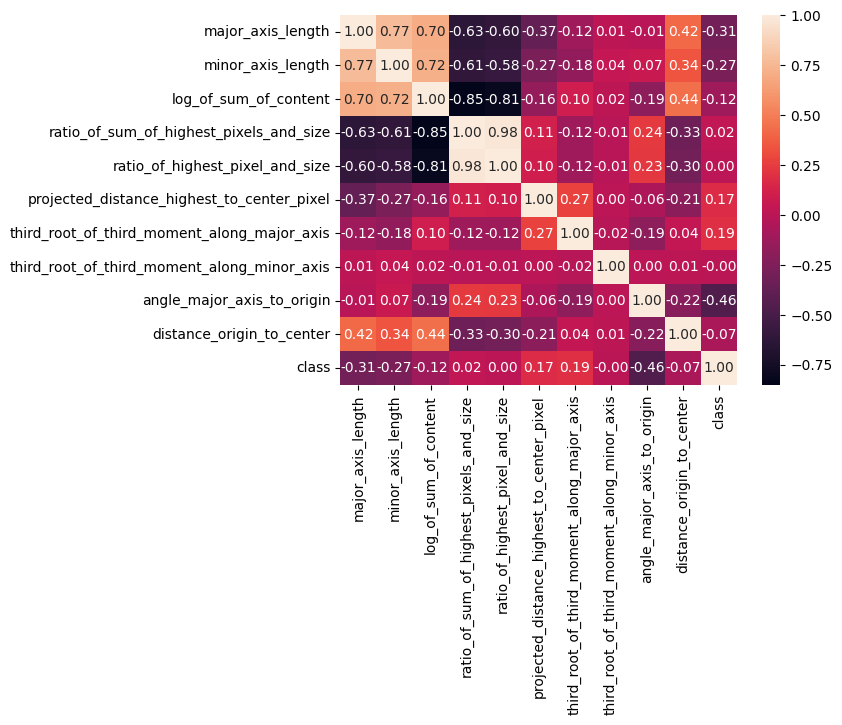

In [65]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

'major_axis_length', 'minor_axis_length', 'log_of_sum_of_content' - сильно коррелируют друг с другом, оставим наиболее коррелирующий с таргетом(class) -> major_axis_length

Отобранные фичи:
- angle_major_axis_to_origin
- major_axis_length
- third_root_of_third_moment_along_minor_axis

<Axes: >

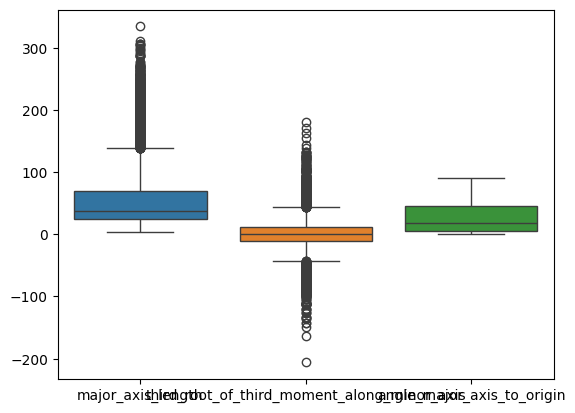

In [66]:
sns.boxplot(data=df[['major_axis_length',
       'third_root_of_third_moment_along_minor_axis',
       'angle_major_axis_to_origin']])

<Axes: >

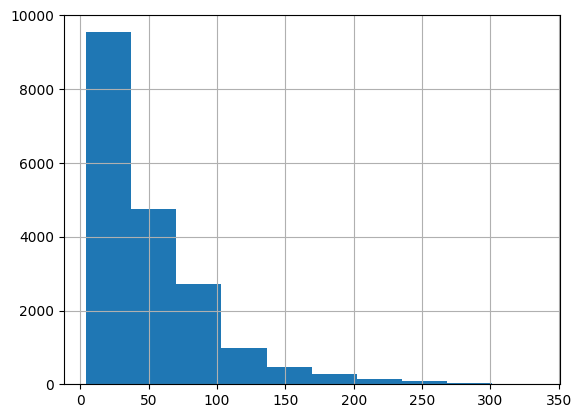

In [67]:
df['major_axis_length'].hist()

In [68]:
Q1 = df['major_axis_length'].quantile(0.25)
Q3 = df['major_axis_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

outliers_iqr = df[(df['major_axis_length'] < lower_bound) | (df['major_axis_length'] > upper_bound)]
print(f"\nКоличество выбросов по методу IQR: {len(outliers_iqr)}")

Q1 (25-й перцентиль): 24.336
Q3 (75-й перцентиль): 70.122175
IQR: 45.786175
Нижняя граница: -44.343262499999994
Верхняя граница: 138.8014375

Количество выбросов по методу IQR: 971


In [69]:
df_removed = df[(df['major_axis_length'] >= lower_bound) & (df['major_axis_length'] <= upper_bound)]

print(f"Размер датасета до удаления: {df.shape[0]}")
print(f"Размер датасета после удаления: {df_removed.shape[0]}")

Размер датасета до удаления: 19020
Размер датасета после удаления: 18049


In [70]:
df_copy = df.copy()
df_copy['bounded_major_axis_length'] = df_copy['major_axis_length']

df_copy.loc[df_copy['major_axis_length'] > upper_bound, 'bounded_major_axis_length'] = upper_bound
df_copy.loc[df_copy['major_axis_length'] < lower_bound, 'bounded_major_axis_length'] = lower_bound

outliers_replaced = df_copy[df_copy['major_axis_length'] != df_copy['bounded_major_axis_length']]
print(outliers_replaced[['major_axis_length', 'bounded_major_axis_length']])

       major_axis_length  bounded_major_axis_length
2               162.0520                 138.801437
990             138.8380                 138.801437
1430            161.2780                 138.801437
1895            141.8840                 138.801437
2447            147.3830                 138.801437
...                  ...                        ...
18994           195.2309                 138.801437
18998           207.2530                 138.801437
18999           172.2442                 138.801437
19013           182.5003                 138.801437
19019           187.1814                 138.801437

[971 rows x 2 columns]


=== ДО ОБРАБОТКИ ===
count    19020.000000
mean        53.250154
std         42.364855
min          4.283500
25%         24.336000
50%         37.147700
75%         70.122175
max        334.177000
Name: major_axis_length, dtype: float64

=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===
count    19020.000000
mean        50.932186
std         34.896855
min          4.283500
25%         24.336000
50%         37.147700
75%         70.122175
max        138.801437
Name: bounded_major_axis_length, dtype: float64


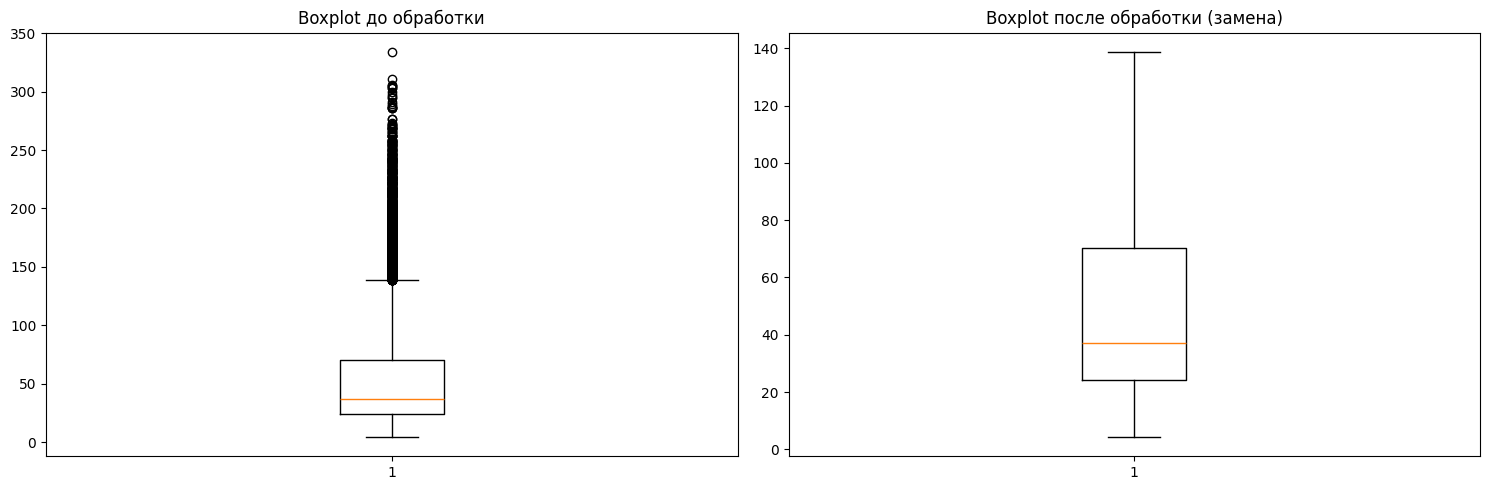

In [73]:
print("=== ДО ОБРАБОТКИ ===")
print(df['major_axis_length'].describe())

print("\n=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===")
print(df_copy['bounded_major_axis_length'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.boxplot(df['major_axis_length'])
ax1.set_title('Boxplot до обработки')

ax2.boxplot(df_copy['bounded_major_axis_length'])
ax2.set_title('Boxplot после обработки (замена)')

plt.tight_layout()
plt.show()

<Axes: >

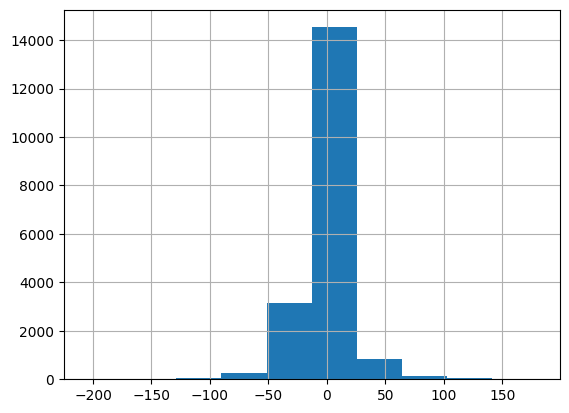

In [75]:
df['third_root_of_third_moment_along_minor_axis'].hist()

In [76]:
df['third_root_of_third_moment_along_minor_axis'].describe()

count    19020.000000
mean         0.249726
std         20.827439
min       -205.894700
25%        -10.849375
50%          0.666200
75%         10.946425
max        179.851000
Name: third_root_of_third_moment_along_minor_axis, dtype: float64

In [78]:
Q1 = df_copy['third_root_of_third_moment_along_minor_axis'].quantile(0.25)
Q3 = df_copy['third_root_of_third_moment_along_minor_axis'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

outliers_iqr = df_copy[(df_copy['third_root_of_third_moment_along_minor_axis'] < lower_bound) | (df_copy['third_root_of_third_moment_along_minor_axis'] > upper_bound)]
print(f"\nКоличество выбросов по методу IQR: {len(outliers_iqr)}")

Q1 (25-й перцентиль): -10.849375
Q3 (75-й перцентиль): 10.946425
IQR: 21.7958
Нижняя граница: -43.543075
Верхняя граница: 43.640125

Количество выбросов по методу IQR: 850


In [80]:
Z_THRESHOLD = 3

df_copy['Z_Score'] = np.abs(stats.zscore(df_copy['third_root_of_third_moment_along_minor_axis']))

outliers_z = df_copy[df_copy['Z_Score'] > Z_THRESHOLD]

print(f"Количество выбросов по методу Z-Score (порог = {Z_THRESHOLD}): {len(outliers_z)}")
print("Выбросы:")
print(outliers_z[['third_root_of_third_moment_along_minor_axis', 'Z_Score']])

Количество выбросов по методу Z-Score (порог = 3): 398
Выбросы:
       third_root_of_third_moment_along_minor_axis   Z_Score
837                                       -63.8020  3.075434
2644                                       92.0674  4.408612
3017                                      101.3930  4.856379
3294                                      -83.3076  4.011992
4263                                      -91.3485  4.398075
...                                            ...       ...
18961                                     103.8140  4.972623
18981                                     111.9970  5.365528
18989                                     -74.1230  3.570995
19013                                     -62.6192  3.018642
19018                                     -63.8389  3.077206

[398 rows x 2 columns]


In [88]:
root3_removed = df_copy[(df_copy['third_root_of_third_moment_along_minor_axis'] >= lower_bound) & (df_copy['third_root_of_third_moment_along_minor_axis'] <= upper_bound)]

print(f"Размер датасета до удаления: {df_copy.shape[0]}")
print(f"Размер датасета после удаления: {root3_removed.shape[0]}")
df_copy_copy = df_copy.copy()
df_copy_copy['bound_third_root'] = df_copy_copy['third_root_of_third_moment_along_minor_axis']

df_copy_copy.loc[df_copy_copy['third_root_of_third_moment_along_minor_axis'] > upper_bound, 'bound_third_root'] = upper_bound
df_copy_copy.loc[df_copy_copy['third_root_of_third_moment_along_minor_axis'] < lower_bound, 'bound_third_root'] = lower_bound

df_final = df_copy_copy[df_copy_copy['third_root_of_third_moment_along_minor_axis'] != df_copy_copy['bound_third_root']]
print(df_final[['third_root_of_third_moment_along_minor_axis', 'bound_third_root']])

Размер датасета до удаления: 19020
Размер датасета после удаления: 18170
       third_root_of_third_moment_along_minor_axis  bound_third_root
2                                         -45.2160        -43.543075
20                                         60.0190         43.640125
540                                        58.1480         43.640125
615                                        50.3800         43.640125
710                                        49.1951         43.640125
...                                            ...               ...
18981                                     111.9970         43.640125
18989                                     -74.1230        -43.543075
18998                                     -57.8600        -43.543075
19013                                     -62.6192        -43.543075
19018                                     -63.8389        -43.543075

[850 rows x 2 columns]


<Axes: >

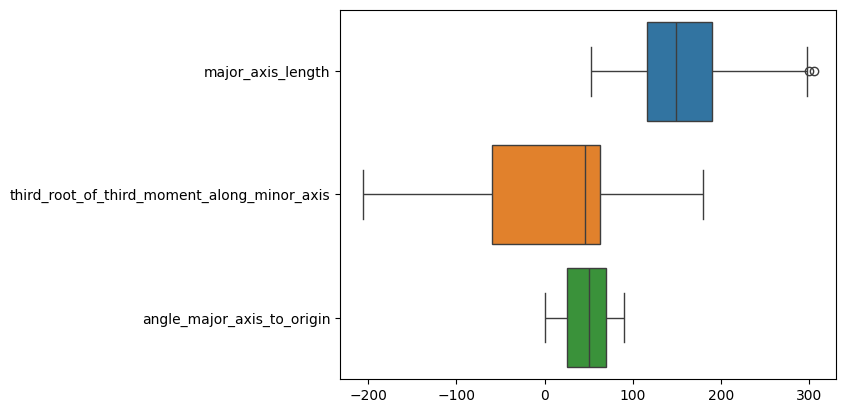

In [89]:
sns.boxplot(
    data=df_final[[
        'major_axis_length',
       'third_root_of_third_moment_along_minor_axis',
       'angle_major_axis_to_origin'
    ]],
    orient='h',
)